Normalization Example

In [1]:
# Normalization Example
import numpy as np

# Sample data
data = np.array([10, 20, 30, 40, 50, 1000]) # 1000 is an outlier

# Min-Max Scaling: Scales values between 0 and 1
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

# Z-Score Standardization: Mean = 0, Standard Deviation = 1
def z_score_standardization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return (data-mean) / std_dev

# Apply normalization techniques
min_max_scaled = min_max_scaling(data)
z_score_scaled = z_score_standardization(data)

# Print result
print("Original Data:", data)
print("Min-Max Scaled Data:", min_max_scaled)
print("Z-Score Standardized Data:", z_score_scaled)





Original Data: [  10   20   30   40   50 1000]
Min-Max Scaled Data: [0.         0.01010101 0.02020202 0.03030303 0.04040404 1.        ]
Z-Score Standardized Data: [-0.50221883 -0.47457376 -0.44692869 -0.41928361 -0.39163854  2.23464343]


Example 1 - MNIST Handwritten Digits Classification

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - accuracy: 0.9260 - loss: 0.2571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9647 - loss: 0.1166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9757 - loss: 0.0802
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.9811 - loss: 0.0611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9852 - loss: 0.0479
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9763 - loss: 0.0754
Test accuarcy:97.63%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step


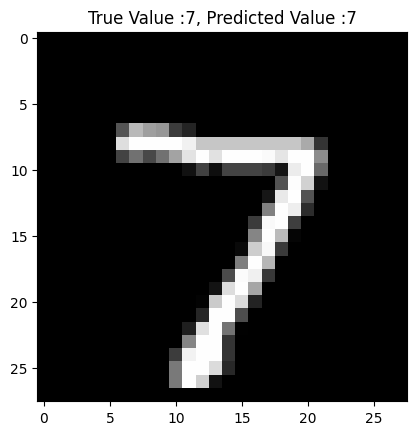

In [5]:
# Dense layers - Example 1 - MNIST Handwritten Digits Data

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Dense layers expect a 1D input, so whenever the preceding layer produces multi-dimensional output,
# We must flatten it to 1D before passing it to a Dense layer

# If the input to a Dense layer is not already 1D, use Flatten to convert it to 1D

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuarcy:{ test_accuracy* 100:.2f}%')

predictions = model.predict(x_test)
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value :{y_test[0]}, Predicted Value :{np.argmax(predictions[0])}")
plt.show()

Example 2 - House Price Prediction (Regression)

Synthetic Dataset

In [7]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset
# Predict house prices based on 10 numerical features

# A synthetic dataset is a dataset that is artificially generated rather than
# collected from real-world observations.

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)  # I’ll get the same random results every time I run the code.”

x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 50000 # House prices between 0-500k

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) * 500000

# Build Model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # single output for regression
])

#compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1) # verbose =1 ,  Progress bar mode – shows a live updating progress bar for each epoch with metrics. (Default)

# Evaluate Model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

# Make a prediction
sample_input = np.random.rand(1,10)
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0]:.2f}')

# MAE is around 243K - 245K, which means on average, the predictions are off by nearly half of the actual house price.
# This is very bad because an error of $243K in a price range of $500K means the model is almost random.
# The dataset is completely random, meaning there is no real pattern for the model to learn.
# The model is guessing house prices randomly, which is why MAE is so large.
# In short, bad model




Epoch 1/20


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 844203520.0000 - mae: 25283.7988 
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 844026944.0000 - mae: 25280.3008
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 843499328.0000 - mae: 25269.8770
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 842258240.0000 - mae: 25245.4453
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 839857408.0000 - mae: 25198.4062
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 835811008.0000 - mae: 25117.2793
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 829577728.0000 - mae: 24994.7598
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 820769536.0000 - mae: 24820.8926
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 809012224.0000 - mae: 24591.7383
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 794143552.0000 - mae: 24297.7109
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 775844352.0000 - m

Synthetic dataset and Normalization

In [9]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset and Normalization
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features) in [0,1] range
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)  # Target values in range 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200)  # Targets in range 0-1

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE (Normalized): {test_mae:.4f}')

# Make a prediction
sample_input = np.random.rand(1, 10) # In [0,1] range
predicted_value = model.predict(sample_input)
print(f'Predict Value (Normalized):{predicted_value[0][0]:.4f}')

# This is again a bad model because we are still training on random values (just normalised values)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Epoch 1/20


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.0964 - mae: 0.2614 
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0889 - mae: 0.2526
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0853 - mae: 0.2482
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.0839 - mae: 0.2470
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.0822 - mae: 0.2449
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.0822 - mae: 0.2449
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.0809 - mae: 0.2425
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0821 - mae: 0.2445
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0801 - mae: 0.2425
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0784 - mae: 0.2394
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.0786 - mae: 0.2396
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.0787 - mae: 0.2395
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━

Dataset from scikit-learn

In [10]:
# Example 2 - House Price Prediction (Regression) with Dataset

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
x, y = data.data, data.target  # Features and target (median house value in 100,000s)

print(f"Target Value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}")

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize features for better training stability - Z-Score Standardization / Standard scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Compute mean & std from training data, then scale
x_test = scaler.transform(x_test) # Use the same scaling parameters to transform test data

# We use the same mean and standard deviation (computed from x_train) to scale x_test
# This ensures that both training and test data follow the same distribution

# If we include x_test when computing mean and standard deviation, the model gets information from the test set before training
# This is called data leakage, which can lead to unrealistically good performance and poor generalization to new data
# Test data should only be used for evaluation after the model is trained

# In real-world applications, new data arrives after training. We do not get to recompute the mean and std for each new data point
# The model should be able to handle unseen data using the same scaling applied during training

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}')  # Convert to actual dollars

# Make a prediction
sample_input = np.expand_dims(x_test[0], axis=0)  # Take one test sample
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}')  # Convert to actual dollars


Target Value Range (in 100,000s): Min = 0.15, Max = 5.00, Mean = 2.07
Epoch 1/20


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - loss: 0.7583 - mae: 0.6002
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.3974 - mae: 0.4457
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.3642 - mae: 0.4270
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3488 - mae: 0.4167
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.3405 - mae: 0.4091
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.3262 - mae: 0.3999
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.3245 - mae: 0.3957
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.3200 - mae: 0.3915
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.3075 - mae: 0.3850
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.3075 - mae: 0.3829
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.3000 - mae: 0.3789
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.2966 - mae: 0.3761
Epoch 13/20


Example 3 - Sentiment Analysis (Binary Classification)

In [11]:
# Example 3 - Sentiment Analysis (Binary Classification) - Without Embedding Layer
# Classify whether a review is positive or negative

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons
# We are ensuring every input is exactly 200 words.

# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers
model = models.Sequential([
    layers.Flatten(input_shape=(200,)),  # Convert 2D sequences to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make a prediction on the first test sample
predicted_sentiment = model.predict(x_test[0:1])
print("Predicted Sentiment:", "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/5


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5012 - loss: 200.3828
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5151 - loss: 65.3377
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5318 - loss: 38.3549
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5458 - loss: 25.1850
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5569 - loss: 16.6514
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.5014 - loss: 18.0626
Test accuracy: 50.14%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Sentiment: Positive


In [12]:
# Example 3 - Sentiment Analysis (Binary Classification) - With Embedding Layer

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure fixed-length inputs
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers with an Embedding layer
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200),  # Converts word indices to vectors
    layers.Flatten(),  # Flatten embeddings into a 1D vector
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7052 - loss: 0.5292
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9395 - loss: 0.1679
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9935 - loss: 0.0288
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9996 - loss: 0.0041
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 1.0000 - loss: 3.8249e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 1.0000 - loss: 2.1546e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 1.5415e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 1.1723e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 1.0000 - loss: 8.9636e-05
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8579 - loss: 0.6073
Test accuracy: 85.79%


Epoch 1/20


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8725 - loss: 0.4807 - val_accuracy: 0.9649 - val_loss: 0.2935
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.2445 - val_accuracy: 0.9649 - val_loss: 0.1619
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1531 - val_accuracy: 0.9649 - val_loss: 0.1086
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9736 - loss: 0.1128 - val_accuracy: 0.9649 - val_loss: 0.0875
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0903 - val_accuracy: 0.9649 - val_loss: 0.0803
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9868 - loss: 0.0775 - val_accuracy: 0.9649 - val_loss: 0.0755
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0681 - val_accuracy: 0.9737 - val_loss: 0.0711
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0617 - val_accuracy: 0.9737 - val_loss: 0.0681
Epo

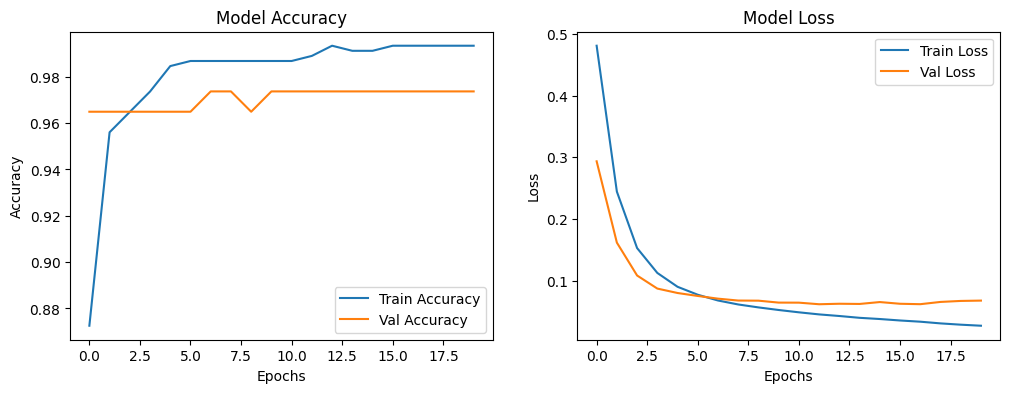

In [13]:
# The Breast Cancer dataset from Scikit-Learn contains 569 samples with 30 numerical features extracted
# from digitized images of breast mass tumors. The goal is to classify tumors as malignant (1) or benign (0)
# based on these features. The dataset was originally curated from the Wisconsin Diagnostic Breast Cancer (WDBC)
# dataset and is commonly used for binary classification tasks in machine learning.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


Epoch 1/50


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6761 - loss: 0.9090 - val_accuracy: 0.7500 - val_loss: 0.7235
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.6668 - val_accuracy: 0.8889 - val_loss: 0.5379
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - loss: 0.4894 - val_accuracy: 0.8889 - val_loss: 0.4036
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.3596 - val_accuracy: 0.8889 - val_loss: 0.3079
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.2646 - val_accuracy: 0.8889 - val_loss: 0.2429
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.1962 - val_accuracy: 0.9167 - val_loss: 0.1976
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.1495 - val_accuracy: 0.9167 - val_loss: 0.1684
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.1187 - val_accuracy: 0.9167 - val_loss: 0.1451
Epoch 9/50
9/9 ━━━

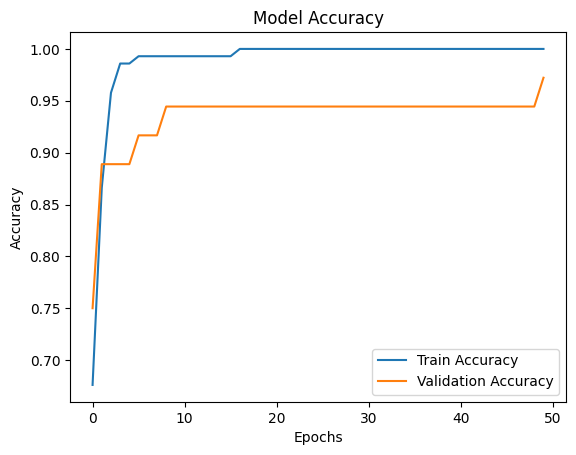

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: 0, Actual Class: 0


In [14]:
# The Wine dataset from Scikit-Learn contains 178 samples with 13 numerical features,
# such as alcohol content, flavonoids, and phenols, representing different chemical properties of wines.
# The goal is to classify wines into three types (Class 0, 1, and 2) based on their composition.
# It originates from the UCI Machine Learning Repository and is commonly used for multiclass classification tasks

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_wine()
X, y = data.data, data.target  # Features and target labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y means both y_train and y_test will have the same class proportions as y.

# Normalize features using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes (0, 1, 2)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since y is not one-hot encoded
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Predict a sample
sample_input = np.expand_dims(X_test[0], axis=0)  # Take one test sample
predicted_class = np.argmax(model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class: {y_test[0]}')

# Using stratify=y ensures that the proportion of each class remains the same in both training and testing sets,
# leading to a more balanced and representative split.

# Example: Without stratify=y
# If you have a dataset with 80% Class 0, 15% Class 1, and 5% Class 2,
# a random split without stratification might result in:

# Training set: 90% Class 0, 8% Class 1, 2% Class 2
# Test set: 60% Class 0, 30% Class 1, 10% Class 2

# This skews the distribution, leading to poor generalization.

# Example: With stratify=y

# Training set: 80% Class 0, 15% Class 1, 5% Class 2
# Test set: 80% Class 0, 15% Class 1, 5% Class 2

# This ensures a balanced representation of all classes in both sets.

# Always use stratify=y when working with classification problems, especially when your dataset has an unequal class distribution.

